# Nonproductive TCR 4 Jun 2023

In [1]:
import numpy as np
import scipy as sp
from scipy.sparse import csr_matrix
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sb

In [2]:
import os
os.chdir('/home/jovyan/fetal_lung_immune_Peng')

In [3]:
sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]
sb.set_palette('colorblind')

In [4]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/Foetal Immune Paper/Chenqu/figures_04062023/'
sc.settings.figdir = fig_path

# Load data

In [5]:
# object loaded with abTCR, gdTCR in TCR_load.ipynb
adata_source = sc.read('write/220120Annotated_Fetal_lung_immune_filtered_soupxcite_ddl.h5ad')

In [6]:
# update productive status to first entry
for chain in ['abT','gdT']:
    col1 = 'productive_'+chain+'_VDJ'
    col2 = 'productive_'+chain+'_VJ'
    for col in [col1,col2]:
        select = adata_source.obs[col].str.startswith(('F','T'))
        adata_source.obs.loc[select, col+'_update'] = np.nan
        tmp = adata_source.obs.loc[select, col]
        adata_source.obs.loc[select, col+'_update'] = [string[0:1] for string in tmp]

### abTCR - filter samples that have been sequenced

In [7]:
meta = pd.read_csv('manifest/manifest.csv')

In [8]:
meta_TCR = meta.loc[~(meta['TCR'].isna()),:]

In [9]:
adata_ab = adata_source[adata_source.obs['sample'].isin(meta_TCR['GEX_update'])].copy() # only leave samples that have been abTCR-sequenced

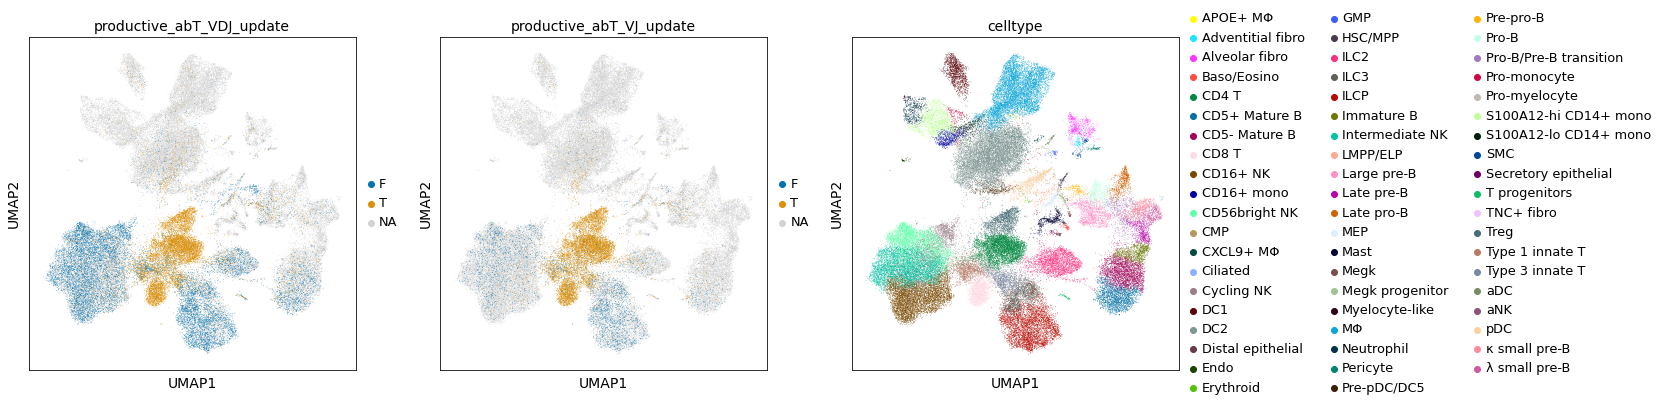

In [10]:
sc.pl.umap(adata_ab,color=['productive_abT_VDJ_update', 'productive_abT_VJ_update','celltype'])

### gdTCR - filter samples that have been sequenced

In [11]:
meta_TCRgd = meta_TCR.loc[~(meta_TCR['gdTCR'].isna()),:]

In [12]:
adata_gd = adata_source[adata_source.obs['sample'].isin(meta_TCRgd['GEX_update'])].copy() # only leave samples that have been gdTCR-sequenced

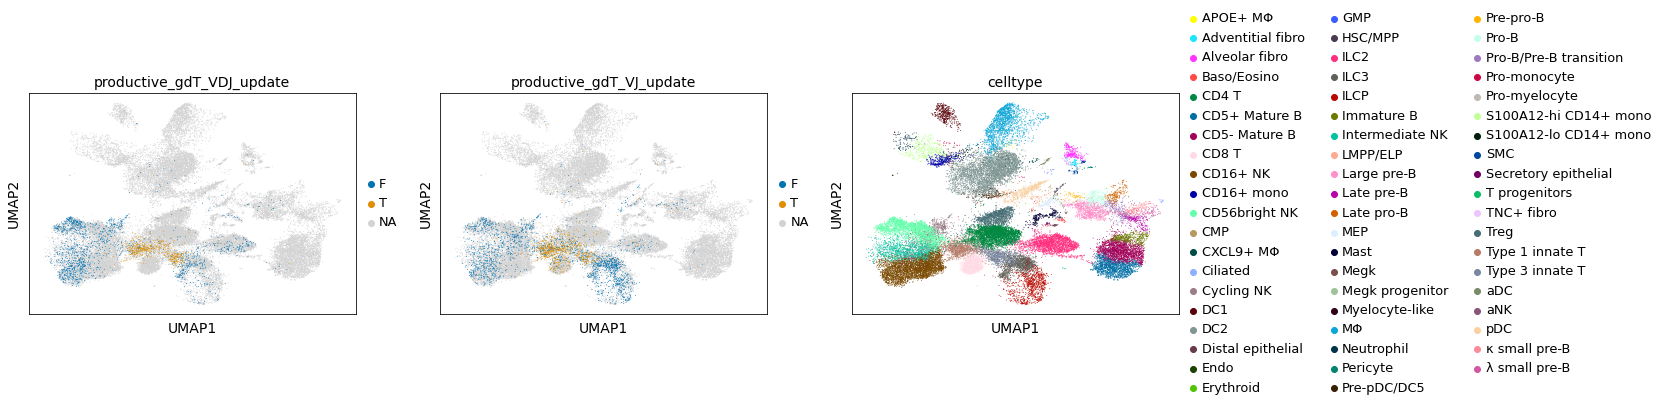

In [13]:
sc.pl.umap(adata_gd,color=['productive_gdT_VDJ_update', 'productive_gdT_VJ_update','celltype'])

# % of productive & nonproductive TCR/bcr in different cell types

In [14]:
celltypes = ['Adventitial fibro', 'Alveolar fibro', 'Ciliated','Distal epithelial',   'Secretory epithelial', 'TNC+ fibro', 'Pericyte','Endo', 'SMC',
                                                                                    'Baso/Eosino','Mast','MEP','Megk progenitor', 'Megk', 'Myelocyte-like','Erythroid', 
                                                                                    'GMP', 'CMP', 'Pro-monocyte', 'Pro-myelocyte', 'S100A12-hi CD14+ mono', 'S100A12-lo CD14+ mono','CD16+ mono', 'CXCL9+ MΦ','APOE+ MΦ','MΦ', 'Neutrophil', 'Pre-pDC/DC5', 'DC1', 'DC2', 'aDC', 'pDC', 
                                                                                    'HSC/MPP', 'LMPP/ELP', 'T progenitors', 'CD4 T','CD8 T','Treg', 'Type 1 innate T', 'Type 3 innate T', 'ILCP',  'ILC2','ILC3', 
                                                                                    'CD16+ NK','CD56bright NK','Intermediate NK', 'aNK', 'Cycling NK','Pre-pro-B', 'Pro-B','Late pro-B', 
                                                                                    'Pro-B/Pre-B transition', 'Large pre-B',  'κ small pre-B', 'λ small pre-B','Late pre-B','Immature B', 'CD5- Mature B','CD5+ Mature B']

### calculate percentages in TCRA/TCRB/TCRG/TCRD

can change the code to do the same calculation for different TCR chains

In [15]:
adata = adata_ab.copy()
locus = 'TRB'
col_select = 'productive_abT_VDJ_update' 

In [16]:
TCR = pd.DataFrame(columns = ['productive','nonproductive','prod+nonprod','total'],  index = celltypes)

In [17]:
for i in range(TCR.shape[0]):
    cell = TCR.index[i]
    TCR.loc[cell,'total'] = sum(adata.obs['celltype']==cell)
    
    TCR.loc[cell,'productive'] = sum(adata.obs.loc[adata.obs['celltype']==cell,col_select]=='T') / TCR.loc[cell,'total'] * 100
    TCR.loc[cell,'nonproductive'] = sum(adata.obs.loc[adata.obs['celltype']==cell,col_select]=='F') / TCR.loc[cell,'total'] * 100

In [18]:
TCR['celltype'] = TCR.index
TCR['prod+nonprod'] = TCR['productive']+TCR['nonproductive']

In [19]:
TCR

,productive,nonproductive,prod+nonprod,total,celltype
Adventitial fibro,0.0,0.900901,0.900901,111,Adventitial fibro
Alveolar fibro,2.627512,1.700155,4.327666,647,Alveolar fibro
Ciliated,0.0,0.0,0.0,14,Ciliated
Distal epithelial,3.333333,0.0,3.333333,60,Distal epithelial
Secretory epithelial,0.0,0.0,0.0,33,Secretory epithelial
TNC+ fibro,2.941176,1.960784,4.901961,102,TNC+ fibro
Pericyte,7.526882,5.376344,12.903226,93,Pericyte
Endo,2.0,4.0,6.0,50,Endo
SMC,3.731343,1.492537,5.223881,134,SMC
Baso/Eosino,10.576923,4.807692,15.384615,104,Baso/Eosino


In [20]:
TCR.to_csv(fig_path+locus+'.csv')

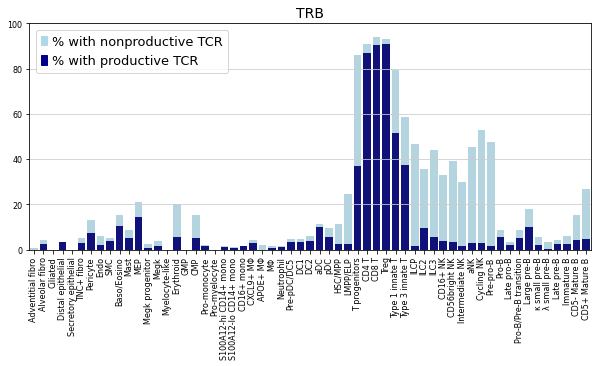

In [21]:
plt.figure(figsize=(10, 4))
bar1 = sb.barplot(x='celltype',  y='prod+nonprod', data=TCR, color='lightblue')
bar2 = sb.barplot(x='celltype', y="productive", data=TCR,  color='darkblue')
legend = [mpatches.Patch(color='lightblue', label='% with nonproductive TCR'),
         mpatches.Patch(color='darkblue', label='% with productive TCR')]
plt.xticks(fontsize=8,rotation=90)
plt.yticks(fontsize=8)
bar1.set(ylim=(0, 100))
plt.xlabel('')
plt.ylabel('')
plt.title(locus)

# add legend
plt.legend(handles=legend)
plt.savefig(fig_path+locus+'.pdf',bbox_inches='tight');

### whether they are expressing j chain only

In [22]:
TRB = pd.DataFrame(columns = ['v only','d only','j only','d+j','v+d','v+j','v+d+j','total'],  index = celltypes)

In [23]:
for i in range(TRB.shape[0]):
    cell = TRB.index[i]
    TRB.loc[cell,'total'] = sum(adata.obs['celltype']==cell)

    j_present = list(~(adata.obs.loc[adata.obs['celltype']==cell,'j_call_abT_VDJ_main'].isin(('None','No_contig'))))
    d_present = list(~(adata.obs.loc[adata.obs['celltype']==cell,'d_call_abT_VDJ_main'].isin(('None','No_contig'))))
    v_present = list(~(adata.obs.loc[adata.obs['celltype']==cell,'v_call_abT_VDJ_main'].isin(('None','No_contig'))))
    
    if TRB.loc[cell,'total']>0:
        TRB.loc[cell,'v+d+j']=sum([a and b and c for a, b, c in zip(j_present, d_present, v_present)]) / TRB.loc[cell,'total'] * 100
        TRB.loc[cell,'v+j']=sum([a and b for a, b in zip(j_present, v_present)]) / TRB.loc[cell,'total'] * 100 - TRB.loc[cell,'v+d+j']
        TRB.loc[cell,'d+j']=sum([a and b for a, b in zip(j_present, d_present)]) / TRB.loc[cell,'total'] * 100 - TRB.loc[cell,'v+d+j']
        TRB.loc[cell,'v+d']=sum([a and b for a, b in zip(v_present, d_present)]) / TRB.loc[cell,'total'] * 100 - TRB.loc[cell,'v+d+j']
        TRB.loc[cell,'v only']=sum(v_present) / TRB.loc[cell,'total'] * 100 - TRB.loc[cell,'v+d+j'] - TRB.loc[cell,'v+j'] - TRB.loc[cell,'v+d']
        TRB.loc[cell,'d only']=sum(d_present) / TRB.loc[cell,'total'] * 100 - TRB.loc[cell,'v+d+j'] - TRB.loc[cell,'v+d'] - TRB.loc[cell,'d+j']
        TRB.loc[cell,'j only']=sum(j_present) / TRB.loc[cell,'total'] * 100 - TRB.loc[cell,'v+d+j'] - TRB.loc[cell,'v+j'] - TRB.loc[cell,'d+j']

In [24]:
TRB['celltype'] = TRB.index

In [25]:
TRB

,v only,d only,j only,d+j,v+d,v+j,v+d+j,total,celltype
Adventitial fibro,0.0,0.0,0.900901,0.0,0.0,0.0,0.0,111,Adventitial fibro
Alveolar fibro,0.0,0.0,1.391036,0.0,0.0,1.391036,1.545595,647,Alveolar fibro
Ciliated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,Ciliated
Distal epithelial,0.0,0.0,0.0,0.0,0.0,1.666667,1.666667,60,Distal epithelial
Secretory epithelial,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,Secretory epithelial
TNC+ fibro,0.0,0.0,1.960784,0.0,0.0,2.941176,0.0,102,TNC+ fibro
Pericyte,0.0,0.0,4.301075,0.0,0.0,6.451613,2.150538,93,Pericyte
Endo,0.0,0.0,4.0,0.0,0.0,2.0,0.0,50,Endo
SMC,0.0,0.0,0.746269,0.746269,0.0,2.985075,0.746269,134,SMC
Baso/Eosino,0.0,0.0,4.807692,0.0,0.0,8.653846,1.923077,104,Baso/Eosino


In [26]:
TRB.to_csv(fig_path+'TCRB_vdj.csv')

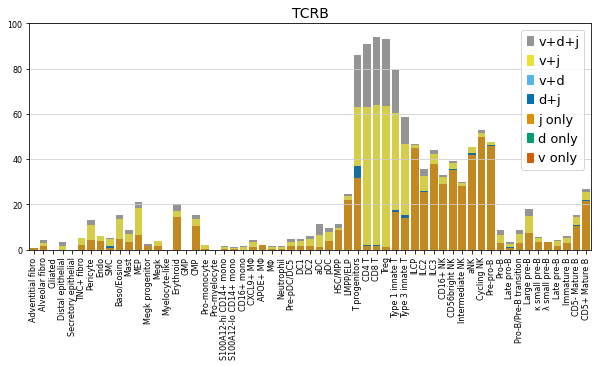

In [27]:
plt.figure(figsize=(10, 4))

legend = []

for i in range(7)[::-1]:
    bar = sb.barplot(x='celltype',  y=np.sum(TRB.iloc[:,0:i+1],axis=1), data=TRB, color=sb.color_palette()[3-i])
    legend = legend+[mpatches.Patch(color=sb.color_palette()[3-i], label=TRB.columns[i])]
plt.xticks(fontsize=8,rotation=90)
plt.yticks(fontsize=8)
bar.set(ylim=(0, 100))
plt.xlabel('')
plt.ylabel('')
plt.title('TCRB')

# add legend
plt.legend(handles=legend)

plt.savefig(fig_path+'TCRB_vdj.pdf',bbox_inches='tight');

################# play - why high % TCRB in MEP/erythroid ?strayed T cells ##############

In [44]:
adata = adata_ab.copy()
locus = 'TRB'
col_select = 'productive_abT_VDJ_update' 

In [45]:
adata.obs['TCR_present'] = adata.obs[col_select].astype('str')
adata.obs.loc[adata.obs[col_select].isna(), 'TCR_present'] = 'nan'
#adata.obs['TCR_present'] = adata.obs['TCR_present'].cat.reorder_categories(['T','F','nan'])

/home/jovyan/my-conda-envs/palantir/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


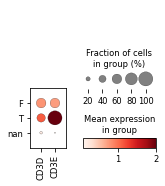

In [46]:
sc.pl.dotplot(adata[adata.obs['celltype'].isin(['Erythroid'])], var_names=['CD3D','CD3E'],groupby='TCR_present')

# TRB VDJ gene usage

### TRBV

In [28]:
# load TCR list by location
TCR_list_by_loc = []
TCR_list_by_loc_dict = {}
for chain in ['TRAV','TRAJ','TRBV','TRBD','TRBJ']:
    path = '/home/jovyan/gene_list/'+chain+'_list_by_location.csv'
    TCR_list_by_loc_dict[chain] = list(pd.read_csv(path, header=None)[0])
    TCR_list_by_loc = TCR_list_by_loc + TCR_list_by_loc_dict[chain]

In [29]:
# genes that are not in TCR_list_by_loc_dict['TRBJ'], TRAJ - chimeric sequences
adata_source.obs['j_call_abT_VDJ_main'].cat.categories[~adata_source.obs['j_call_abT_VDJ_main'].cat.categories.isin(TCR_list_by_loc_dict['TRBJ'])] 

Index(['No_contig', 'None', 'TRBJ2-1,TRBJ1-3,TRBJ2-5'], dtype='object')

In [30]:
celltypes = ['T progenitors', 'CD4 T','CD8 T','Treg', 'Type 1 innate T', 'Type 3 innate T', 'ILCP',  'ILC3', 'ILC2',
                                                                                    'CD16+ NK','CD56bright NK','Intermediate NK', 'aNK', 'Cycling NK','Pre-pro-B', 'Pro-B','Late pro-B', 
                                                                                    'Pro-B/Pre-B transition', 'Large pre-B',  'κ small pre-B', 'λ small pre-B','Late pre-B','Immature B', 'CD5- Mature B','CD5+ Mature B']

In [31]:
TRBJ = pd.DataFrame(columns = TCR_list_by_loc_dict['TRBJ'],  index = celltypes) # remove TRAJ - chimeric sequences
TRBJ_total = pd.DataFrame(columns = ['total_cell_count'],  index = celltypes)

In [32]:
for i in range(TRBJ.shape[0]):
    cell = TRBJ.index[i]
    counter = Counter(adata.obs.loc[adata.obs['celltype']==cell,'j_call_abT_VDJ_main'])
    for TRBJ_type in TRBJ.columns:
        TRBJ.loc[cell,TRBJ_type] = counter[TRBJ_type]
    
    TRBJ_total.loc[cell,'total_cell_count'] = np.sum(TRBJ.loc[cell,:])
    if np.sum(TRBJ.loc[cell,:])>0:
        TRBJ.loc[cell,:] = TRBJ.loc[cell,:] / np.sum(TRBJ.loc[cell,:]) * 100

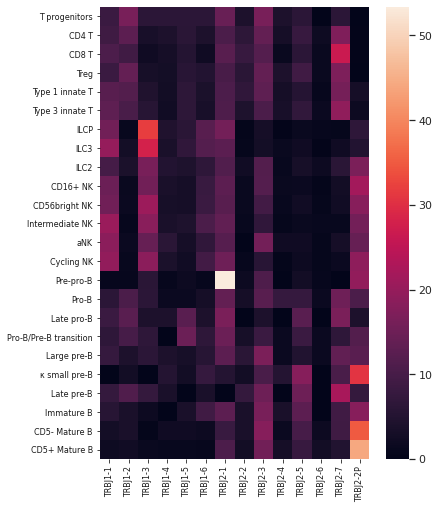

In [33]:
np.random.seed(0)
fig, ax = plt.subplots(figsize=(6,8))
sb.set_theme()
uniform_data = TRBJ.loc[TRBJ_total['total_cell_count']>20,:]
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=8)
ax.set_yticklabels(ylabels, size=8)
plt.savefig(fig_path+'TRBJ_vdj_usage.pdf',bbox_inches='tight');

In [34]:
uniform_data.to_csv(fig_path+'TRBJ_vdj_usage.csv')

### TRBC

In [35]:
adata.obs['c_call_abT_VDJ'].cat.categories

Index(['No_contig', 'None', 'TRAC|TRBC1', 'TRBC1', 'TRBC1|TRBC1',
       'TRBC1|TRBC1|TRBC1', 'TRBC1|TRBC1|TRBC1|TRBC1',
       'TRBC1|TRBC1|TRBC1|TRBC1|TRBC1', 'TRBC1|TRBC1|TRBC1|TRBC2',
       'TRBC1|TRBC1|TRBC1|TRBC2|TRBC2', 'TRBC1|TRBC1|TRBC2',
       'TRBC1|TRBC1|TRBC2|TRBC1', 'TRBC1|TRBC1|TRBC2|TRBC1|TRBC1',
       'TRBC1|TRBC1|TRBC2|TRBC1|TRBC2', 'TRBC1|TRBC1|TRBC2|TRBC2',
       'TRBC1|TRBC1|TRBC2|TRBC2|TRBC1', 'TRBC1|TRBC1|TRBC2|TRBC2|TRBC2',
       'TRBC1|TRBC1|TRBC2|TRBC2|TRBC2|TRBC1', 'TRBC1|TRBC2',
       'TRBC1|TRBC2|TRBC1', 'TRBC1|TRBC2|TRBC1|TRBC1',
       'TRBC1|TRBC2|TRBC1|TRBC1|TRBC1', 'TRBC1|TRBC2|TRBC1|TRBC1|TRBC2',
       'TRBC1|TRBC2|TRBC1|TRBC2', 'TRBC1|TRBC2|TRBC1|TRBC2|TRBC1',
       'TRBC1|TRBC2|TRBC1|TRBC2|TRBC1|TRBC2', 'TRBC1|TRBC2|TRBC1|TRBC2|TRBC2',
       'TRBC1|TRBC2|TRBC2', 'TRBC1|TRBC2|TRBC2|TRBC1',
       'TRBC1|TRBC2|TRBC2|TRBC1|TRBC1', 'TRBC1|TRBC2|TRBC2|TRBC1|TRBC1|TRBC2',
       'TRBC1|TRBC2|TRBC2|TRBC1|TRBC2', 'TRBC1|TRBC2|TRBC2|TRBC2',
       '

In [36]:
adata.obs['c_call_abT_VDJ_main'] =adata.obs['c_call_abT_VDJ'].astype('str')
row_select = adata.obs['c_call_abT_VDJ'].str.startswith('T')
adata.obs.loc[row_select, 'c_call_abT_VDJ_main'] = [call.split('|')[0] for call in adata.obs.loc[row_select, 'c_call_abT_VDJ_main']]

adata.obs.loc[adata.obs['c_call_abT_VDJ_main'].isin(['No_contig','None']),'c_call_abT_VDJ_main'] = np.nan

In [37]:
adata.obs['c_call_abT_VDJ_main'].unique()

array([nan, 'TRBC2', 'TRBC1', 'TRAC'], dtype=object)

In [38]:
adata.obs['c_call_abT_VDJ_main'] = adata.obs['c_call_abT_VDJ_main'].astype('category')

In [39]:
TRBC = pd.DataFrame(columns = ['TRBC1','TRBC2'],  index = celltypes)
TRBC_total = pd.DataFrame(columns = ['total_cell_count'],  index = celltypes)

In [40]:
for i in range(TRBC.shape[0]):
    cell = TRBC.index[i]
    counter = Counter(adata.obs.loc[adata.obs['celltype']==cell,'c_call_abT_VDJ_main'])
    for TRBC_type in TRBC.columns:
        TRBC.loc[cell,TRBC_type] = counter[TRBC_type]
    
    TRBC_total.loc[cell,'total_cell_count'] = np.sum(TRBC.loc[cell,:])
    if np.sum(TRBC.loc[cell,:])>0:
        TRBC.loc[cell,:] = TRBC.loc[cell,:] / np.sum(TRBC.loc[cell,:]) * 100

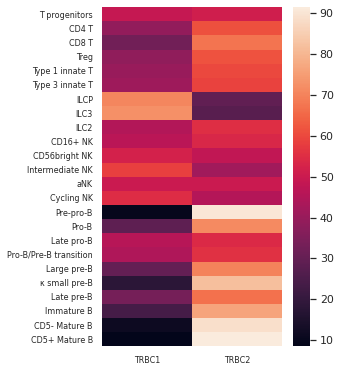

In [41]:
np.random.seed(0)
fig, ax = plt.subplots(figsize=(4,6))
sb.set_theme()
uniform_data = TRBC.loc[TRBC_total['total_cell_count']>20,:]
uniform_data=uniform_data.astype('float')
ax = sb.heatmap(uniform_data)
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels, size=8)
ax.set_yticklabels(ylabels, size=8)
plt.savefig(fig_path+'TRBC_vdj_usage.pdf',bbox_inches='tight');

In [42]:
uniform_data.to_csv(fig_path+'TRBC_vdj_usage.csv')

### use TCRB information for PCA plotting

In [43]:
bdata = adata[adata.obs['celltype'].isin(celltypes)]

In [44]:
bdata = bdata[bdata.obs['productive_abT_VDJ_update'].isin(['T','F'])] #choose cells that have productive or nonproductive tcrb

In [45]:
bdata.shape

(21476, 27292)

In [46]:
bdata = bdata[bdata.obs['j_call_abT_VDJ_main'].isin(TCR_list_by_loc_dict['TRBJ'])]
bdata = bdata[bdata.obs['c_call_abT_VDJ_main'].isin(['TRBC1','TRBC2'])]

In [47]:
bdata.shape

(21273, 27292)

In [48]:
bdata.obs['smp_celltype'] = bdata.obs['sample'].astype('string') +'_'+ bdata.obs['celltype'].astype('string')

<ipython-input-48-77315797d545>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bdata.obs['smp_celltype'] = bdata.obs['sample'].astype('string') +'_'+ bdata.obs['celltype'].astype('string')


In [49]:
df1 = pd.DataFrame({'smp_celltype': Counter(bdata.obs['smp_celltype']).keys(),
                  'cellcount': Counter(bdata.obs['smp_celltype']).values()})

In [50]:
new_list = df1.loc[df1['cellcount']>20,'smp_celltype'] # smp_celltype of at least 20 cells 

In [51]:
TRBJ_list = list(bdata.obs['j_call_abT_VDJ_main'].cat.categories)
TRBC_list = list(bdata.obs['c_call_abT_VDJ_main'].cat.categories)
TCR_list = TRBJ_list + TRBC_list

In [52]:
TCR = pd.DataFrame(columns = TCR_list, index = new_list)

In [53]:
for i in range(TCR.shape[0]):
    cell = TCR.index[i]
        
    counter5 = Counter(bdata.obs.loc[bdata.obs['smp_celltype']==cell,'j_call_abT_VDJ_main'])
    for TRBJ in TRBJ_list:
        TCR.loc[cell,TRBJ] = counter5[TRBJ]
        
    counter6 = Counter(bdata.obs.loc[bdata.obs['smp_celltype']==cell,'c_call_abT_VDJ_main'])
    for TRBC in TRBC_list:
        TCR.loc[cell,TRBC] = counter6[TRBC]
        
    # normalise  
    TCR.loc[cell,TCR.columns.isin(TRBJ_list)] = TCR.loc[cell,TCR.columns.isin(TRBJ_list)] / np.sum(TCR.loc[cell,TCR.columns.isin(TRBJ_list)]) * 100
    TCR.loc[cell,TCR.columns.isin(TRBC_list)] = TCR.loc[cell,TCR.columns.isin(TRBC_list)] / np.sum(TCR.loc[cell,TCR.columns.isin(TRBC_list)]) * 100

In [54]:
df2 = pd.DataFrame(index = TCR.index, columns=['cell_type'])
df2['cell_type'] = list(TCR.index)

In [64]:
TCR.to_csv(fig_path+'TCR_PCA_X.csv')

In [55]:
TCR_adata = sc.AnnData(X =np.array(TCR), obs = df2, var = list(TCR.columns))

<ipython-input-55-cdbcde6fa032>:1: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  TCR_adata = sc.AnnData(X =np.array(TCR), obs = df2, var = list(TCR.columns))


In [56]:
sc.pp.pca(TCR_adata, n_comps = 2, use_highly_variable = False, svd_solver = 'arpack', random_state = 1712)
#sc.pp.neighbors(TCR_adata)
#sc.tl.umap(TCR_adata, random_state = 1712)

In [57]:
# import utils
import sys
sys.path.append('/home/jovyan/chenqu_utils')
from array_operations import *
from colors import *

In [58]:
TCR_adata.obs['cell_type']=TCR_adata.obs['cell_type'].astype('category')
TCR_adata.obs['cell_count']=lookup(TCR_adata.obs['cell_type'], df1,'smp_celltype','cellcount')
TCR_adata.obs['cell_type'] = lookup(TCR_adata.obs['cell_type'], bdata.obs,'smp_celltype','celltype')

In [66]:
TCR_adata.obs.to_csv(fig_path+'TCR_PCA_cell_count.csv')

In [59]:
PCA = TCR_adata.obsm['X_pca'][:,range(2)]

In [60]:
celltypes_new = [cell for cell in celltypes if cell in set(TCR_adata.obs['cell_type'])]

In [61]:
TCR_adata.obs['cell_type'] = TCR_adata.obs['cell_type'].astype('category')
TCR_adata.obs['cell_type'] = TCR_adata.obs['cell_type'].cat.reorder_categories(celltypes_new)

/home/jovyan/my-conda-envs/palantir/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


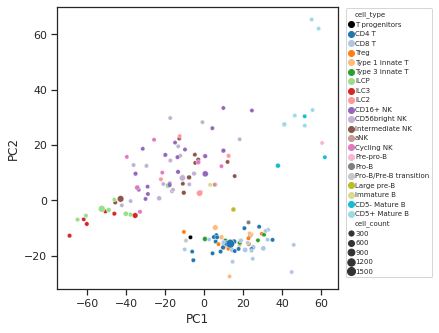

In [62]:
sb.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(5,5))
sb.scatterplot(x=-PCA[:,0],y=PCA[:,1], hue=TCR_adata.obs['cell_type'],size = TCR_adata.obs['cell_count'],palette=["#000000"]+sb.color_palette('tab20'))
ax.legend(bbox_to_anchor=(1.03, 0.995), loc=2, borderaxespad=0.,fontsize='xx-small')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig(fig_path+'TCR_PCA.pdf',bbox_inches='tight');